## Tbrquiv ##

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import raytrace as rt
import numpy as np
import math
from pylab import *
from raytrace import implane
import rtcore

/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [ ]:
# Global constants & Derived Quantities
DeltaS=0.01  # Initial ray path increment in solar radii
freq_hz = 300.e6 # Hz, radio wave frequency
c_light_cms = 2.9979245800e10
ProtonChargeCGSe = 4.80320427e-10
ProtonMass_g = 1.672621638e-24
ProtonMassInv = 1./ProtonMass_g
ElectronMass_g = 9.10938215e-28
Boltzmannk_ergK = 1.380650424e-16
Rsun_cm = 6.955e10 # in cm
Rsun_km = Rsun_cm / 1.e5
omega = 2*np.pi*freq_hz # rad/s, radio wave frequency
freq2 = freq_hz * freq_hz # Hz^2, radio wave frequency squared
omega2 = omega * omega # (rad/s)^2, radio wave frequency squared
k0 = omega / c_light_cms # # k0 = omega/c_light_cms, wave number in a vacuum
k0_Rsun = k0 * Rsun_cm # wave number in rad/Rsun
rhocr = np.pi*ProtonMass_g*ElectronMass_g*(freq_hz/ProtonChargeCGSe)**2
#pf2ne(freq_hz) # Critical density at given self.freq
rhocr_inv = 1 / rhocr # 1/self.RhoCr
tol = 0.005
tol2 = tol**2
grid=(100,100)
rect=(-2, -2, 2, 2)
obs=(215, 0, 0)  # Position of the observer (the earth's coordinates) in SGI system
rsph = 25  # Radius of the integrarion sphere
nx = int(grid[0])
ny = int(grid[1])
ds = np.empty((ny, nx), dtype=np.double) # Initial ray increments (steps)
ds[:] = DeltaS
absminstep = 1e-4*np.average(ds)  # Absolute minimum step for the rays
toleps = 1e-6  # Tolerance and maximum number of iterations for finding the critical surface with the Newton method
cntmax = 50.
h_chromo_km = 10000
r_chromo = (Rsun_km + h_chromo_km - 1000.)/Rsun_km
r_chro_cor = (Rsun_km + h_chromo_km)/Rsun_km
r_corona = (Rsun_km + h_chromo_km + 1000.)/Rsun_km
Te_corona_K = 1.0e6   # K 
Te_chromo_K = 3.0e4   # K
AU_m = 149597870700   # Sun-earth distance in meters
AU_Rsun = 215.097     # Sun-earth distance in solar radii
Msun_G = 1.0          # Solar dipole, G/Rsun^3
Mdir = np.array((0., 0., 1.), dtype=np.double)  # Solar dipole direction vector (unity length)
Coulomb_log = 20.0  # Coulomb logarithm
e2 = (ProtonChargeCGSe)**2  # e^2
e2w2 = e2/omega2            # (e/w)^2
e_ovr_mcw2 = e2w2/((ElectronMass_g*c_light_cms)**2) # (e/mcw)^2
e2_4pi_ovr_m = 4.*np.pi*e2/ElectronMass_g  # 4pi e^2/m
e2_4pi_ovr_mw2 = 4.*np.pi*e2w2/ElectronMass_g  # 4pi e^2/m w^2
twokf2c2 = 2.*Boltzmannk_ergK*freq2/c_light_cms  # Rayleigh-Jeans factor, 2kf^2/c^2
lnLambda_13p7 = 13.7*Coulomb_log
cnu = 3.0   # Coef. at Ginzburg's nu_eff
callcount = 1.0
niter = 1500  #The maximum iterations to perform using the algorithm
trkrays = [[50,50],[30,30],[30,50],[40,40]] # A 2D array of coordinates on the implane to trace throughout the algorithm.
trkparms = ['Dir', 'Arclen', 'Dist', 'Rho', 'gRho', 'Bfield'] # a list of parameter names to store with the trajectory.
npmax = 1000 # maximum number of trajectory points to store

## Simulation code starts from here ##

In [3]:

# Initialize image plane
implane1 = rt.implane(grid,
                   rect,
                   obs,
                   rsph,
                   freq=freq_hz,
                   mode='TbrIQUV',
                   trknpmax=1500)

implane1.package = '/home/hp/raytrace/py_raytr_threaded'

plf_cname =  plasma_parameters.c
fname =  plasma_parameters.c
dname =  /home/hp/raytrace_work/raytrace_scripts
bfname =  plasma_parameters.c
name =  plasma_parameters
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c /home/hp/raytrace_work/raytrace_scripts/streamer.c -o streamer.o
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c plasma_parameters.c -o plasma_parameters.o
gcc -shared streamer.o plasma_parameters.o -L/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/lib -L/usr/lib -lm -lmxv -o plasma_parameters.so


In [ ]:
test1 = rt.implane(grid,
                   rect,
                   obs,
                   rsph,
                   freq=freq_hz,
                   mode='TbrIQUV',
                   trkparms=['pos'],
                   trknpmax=1500)

test1.package = '/home/hp/raytrace/py_raytr_threaded'
trajectories = test1.trace(niter, trkrays)
print(trajectories)

plf_cname =  plasma_parameters.c
fname =  plasma_parameters.c
dname =  /home/hp/raytrace_work/raytrace_scripts
bfname =  plasma_parameters.c
name =  plasma_parameters
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c /home/hp/raytrace_work/raytrace_scripts/streamer.c -o streamer.o
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c plasma_parameters.c -o plasma_parameters.o
gcc -shared streamer.o plasma_parameters.o -L/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/lib -L/usr/lib -lm -lmxv -o plasma_parameters.so
None


In [5]:
test1_tbriquv=np.array(test1.tbriquv)

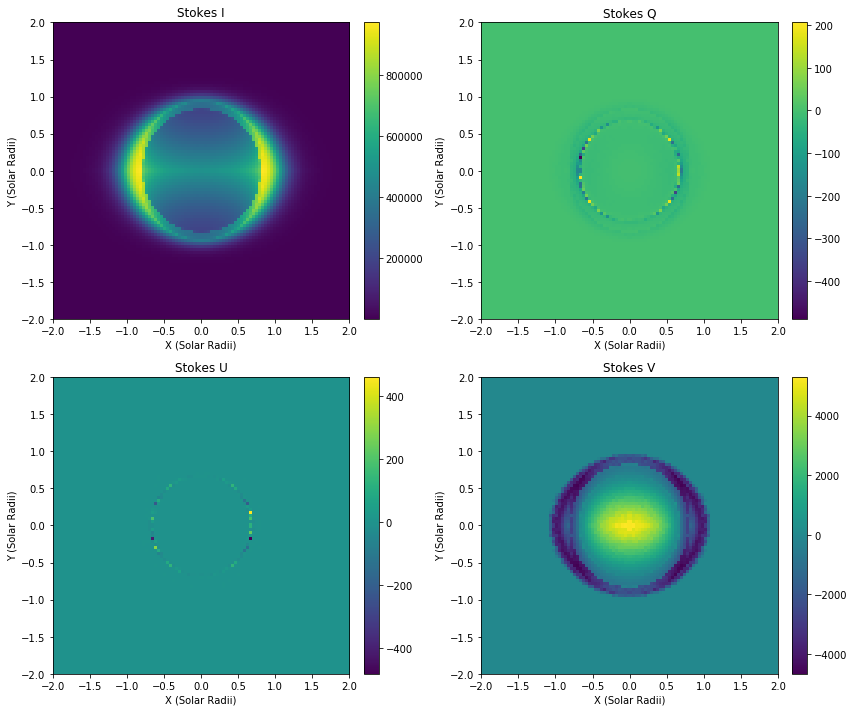

In [ ]:
# Define extent in solar radii
extent = [-2, 2, -2, 2]  # [xmin, xmax, ymin, ymax]

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

titles = [
    "Stokes I",
    "Stokes Q",
    "Stokes U",
    "Stokes V"
]

axes = axes.flatten()

for i in range(4):
    im = axes[i].imshow(
        test1_tbriquv[:, :, i2.48999875e+01,],
        extent=extent,
        origin="lower"   # important so y increases upward
    )
    
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("X (Solar Radii)")
    axes[i].set_ylabel("Y (Solar Radii)")
    
    plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [7]:
output_dir ="/home/hp/raytrace_work/raytrace_results/TbrIQUV_300_MHz"


# Define extent in solar radii
extent = [-2, 2, -2, 2]

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

titles = ["Stokes I", "Stokes Q", "Stokes U", "Stokes V"]
axes = axes.flatten()

for i in range(4):
    im = axes[i].imshow(
        test1_tbriquv[:, :, i],
        extent=extent,
        origin="lower"
    )

    axes[i].set_title(titles[i])
    axes[i].set_xlabel("X (Solar Radii)")
    axes[i].set_ylabel("Y (Solar Radii)")
    axes[i].set_xticks([-2, -1, 0, 1, 2])
    axes[i].set_yticks([-2, -1, 0, 1, 2])

    plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

plt.tight_layout()

# Save figure to the existing folder
output_path = os.path.join(output_dir, "stokes_IQUV_2x2.png")
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.close()